<a href="https://colab.research.google.com/github/pratikshakaklij/Artificial_Intelligence_Assignment_All/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## use case : Bulid an ANN model that predicts the power engergy for powerplant based data.independent features: sensor readings related to powerplant machine

In [67]:
from warnings import filterwarnings
filterwarnings('ignore')

In [68]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


AT : ATMOSPHERIC TEMP
V:VACCUM
AP: ATMOSPHERIC Pressure
RH: RELATIVE HUMIDITY
PE: POWER ENERGY

## perform basic data quality check

In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [70]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [71]:
df.duplicated().sum()

np.int64(41)

In [72]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [73]:
df = df.drop_duplicates()

In [74]:
df.describe()

,AT,V,AP,RH,PE
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


## separate data into x and y
x = all features
y = power energy

In [75]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [76]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [77]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data preprosessing and data cleaning

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [79]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()).set_output(transform = 'pandas')

In [80]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [81]:

x_pre = num_pipeline.fit_transform(X)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## # Train test split

In [82]:
from sklearn.model_selection import train_test_split
xtrain , xtest,ytrain,ytest = train_test_split(x_pre,Y,train_size=0.85,random_state=21)

In [83]:
print(xtrain.shape , xtest.shape ,ytrain.shape , ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


### Scenario 1: Target variable `Y` is a pandas Series

If you select a single column using `df['column_name']`, pandas returns a Series. When `train_test_split` processes a Series, the resulting `ytrain` and `ytest` will also be Series, and their `.shape` will be `(number_of_rows,)`.

In [84]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is available from previous cells
# Create Y as a Series
Y_series = df['PE']

xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, Y_series, train_size=0.85, random_state=21)

print(f"Shape when Y is a Series: ytrain_s.shape={ytrain_s.shape}, ytest_s.shape={ytest_s.shape}")
print(f"Type of ytrain_s: {type(ytrain_s)}")

Shape when Y is a Series: ytrain_s.shape=(8097,), ytest_s.shape=(1430,)
Type of ytrain_s: <class 'pandas.core.series.Series'>


### Scenario 2: Target variable `Y` is a single-column pandas DataFrame

If you select a single column using `df[['column_name']]`, pandas returns a DataFrame (even if it only has one column). When `train_test_split` processes a single-column DataFrame, the resulting `ytrain` and `ytest` will often remain DataFrames, and their `.shape` will be `(number_of_rows, 1)`.

In your current notebook, you defined `Y = df[['PE']]`, which is a single-column DataFrame. However, `train_test_split` in some scikit-learn versions or contexts can still flatten a single-column DataFrame into a Series for the target, leading to the `(rows,)` output you observed. It's good practice to be aware of this potential behavior.

Let's explicitly check this:

In [85]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is available from previous cells
# Create Y as a single-column DataFrame
Y_dataframe = df[['PE']]

xtrain_df, xtest_df, ytrain_df, ytest_df = train_test_split(X, Y_dataframe, train_size=0.85, random_state=21)

print(f"Shape when Y is a DataFrame: ytrain_df.shape={ytrain_df.shape}, ytest_df.shape={ytest_df.shape}")
print(f"Type of ytrain_df: {type(ytrain_df)}")

Shape when Y is a DataFrame: ytrain_df.shape=(8097, 1), ytest_df.shape=(1430, 1)
Type of ytrain_df: <class 'pandas.core.frame.DataFrame'>


As you can see, the way you define `Y` (as a Series vs. a single-column DataFrame) can influence the output shape from `train_test_split`. Both are generally acceptable for most machine learning models, but it's good to be aware of the underlying data structure.

## Artifical Neural Network Model Buliding

In [86]:
from keras.models import Sequential
from keras.layers import Dense


In [87]:
xtrain.shape

(8097, 4)

In [88]:
xtrain.shape[1]

4

In [89]:
model = Sequential()

# add the input layer by specifying input_shape in the first Dense layer
model.add(Dense(units=8, activation='relu', input_shape=(xtrain.shape[1],)))

# add the hidden layer2
model.add(Dense(units=4, activation='relu'))

# add the output layer
model.add(Dense(units=1, activation='linear'))

##

In [90]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [92]:
neural_network = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 206053.2812 - mae: 453.6011 - val_loss: 203835.9844 - val_mae: 451.1463
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 200028.9688 - mae: 446.8445 - val_loss: 186828.6406 - val_mae: 431.5095
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 177834.0781 - mae: 420.4789 - val_loss: 149577.0938 - val_mae: 383.6164
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135953.0625 - mae: 363.4402 - val_loss: 102129.4688 - val_mae: 307.4213
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 89917.9844 - mae: 283.1705 - val_loss: 63710.3906 - val_mae: 230.0209
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55595.7188 - mae: 212.3385 - val_loss: 39211.1797 - val_mae: 178.5811
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33843.4922 - mae: 164.7465 - val_loss: 23186.8281 - val_mae: 134.1144
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19687.5957 - mae: 121.

## plot the learing curve


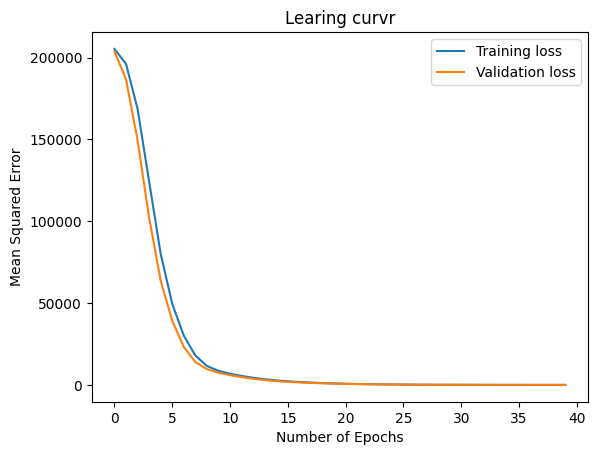

In [93]:
import matplotlib.pyplot as plt
plt.plot(neural_network.history['loss'],label='Training loss')
plt.plot(neural_network.history['val_loss'],label='Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learing curvr")
plt.show()



## this mean overfitting
traing loss : low
testing loss: high

Evaluate the model

In [94]:
model.evaluate(xtrain,ytrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7550 - mae: 3.8467


[27.163818359375, 3.871948719024658]

In [95]:
model.evaluate(xtest,ytest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1235 - mae: 3.9170


[27.128408432006836, 3.8962740898132324]

In [100]:
ypre_train = model.predict(xtrain)

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(ytrain,ypre_train)
mae = mean_absolute_error(ytrain,ypre_train)
r2 = r2_score(ytrain,ypre_train)

print(mse)
print(mae)
print(r2)

27.16382598876953
3.871948480606079
0.9061078429222107


In [96]:
ypre_test = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [99]:
mse = mean_squared_error(ytest,ypre_test)
mae = mean_absolute_error(ytest,ypre_test)
r2 = r2_score(ytest,ypre_test)

print(mse)
print(mae)
print(r2)

27.128408432006836
3.8962740898132324
0.9082801938056946


Save the model

In [104]:
model.save('PEpredictions.keras')

Load the model

In [107]:
from keras.models import load_model
m=load_model('/content/PEpredictions.keras')
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

## Generate out of sample predictions

In [109]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv')
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [110]:
xnew_pre = num_pipeline.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [112]:
Pe_pre = m.predict(xnew_pre)
Pe_pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[444.33734],
       [480.28195],
       [437.22238]], dtype=float32)

In [113]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [118]:
xnew["PE Predictions"] = xnew["PE Predictions"].astype(int).round(2)
xnew

,AT,V,AP,RH,PE Predictions
0,25,51.5,1000.1,57.0,444
1,32,41.0,1051.1,80.0,480
2,28,NaN,1010.2,NaN,437


In [120]:
xnew.to_csv("Pre_updated_file",index=False)